In [11]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
from scipy.signal import find_peaks


In [12]:
inputfolder = './dataFiles'
outputfolder = './plots'

In [13]:
def getfft(data):
    # data = column3.to_numpy()
    N = data.shape[0]
    t = np.arange(N)
    data_fft= np.abs(np.fft.fft(data, axis=0))
    freq = np.fft.fftfreq(t.shape[-1])
    n = freq.size
    # plt.plot(freq[1:n//2], data_fft[1:n//2])
    # plt.xlim(0,0.0005)
    freq = freq[1:n//2]
    data_fft = data_fft[1:n//2]
    return freq, data_fft

mean drag = 1.4609221036214557
mean lift = 0.0031286526520268175
sq233.data frequency: 0.00019446929329858817 Hz
mean drag = 1.3734906643765235
mean lift = 0.00012306820400861617
sq133.data frequency: 0.0003255109612278031 Hz
mean drag = 1.4084297504732493
mean lift = 0.0005373271820113397
sq100.data frequency: 0.00031048130288417795 Hz
mean drag = 3.823680616457939
mean lift = 0.0020207645728942646
sq10.data frequency: 0.0018767351471404774 Hz
mean drag = 2.5452227017972255
mean lift = 0.00043871229715551337
sq20.data frequency: 0.0018895887365690998 Hz
mean drag = 1.8188302888396932
mean lift = 0.00011271587546251018
sq40.data frequency: 0.0018281444033624225 Hz
mean drag = 1.5365424075196812
mean lift = -0.005587941567033521
sq267.data frequency: 0.000191164818940466 Hz
mean drag = 6.297640397818488
mean lift = 0.007468445445574435
sq5.data frequency: 6.76246830092984e-05 Hz
mean drag = 1.5517590703520665
mean lift = 0.00028329418085585814
sq60.data frequency: 0.00026916927546308646

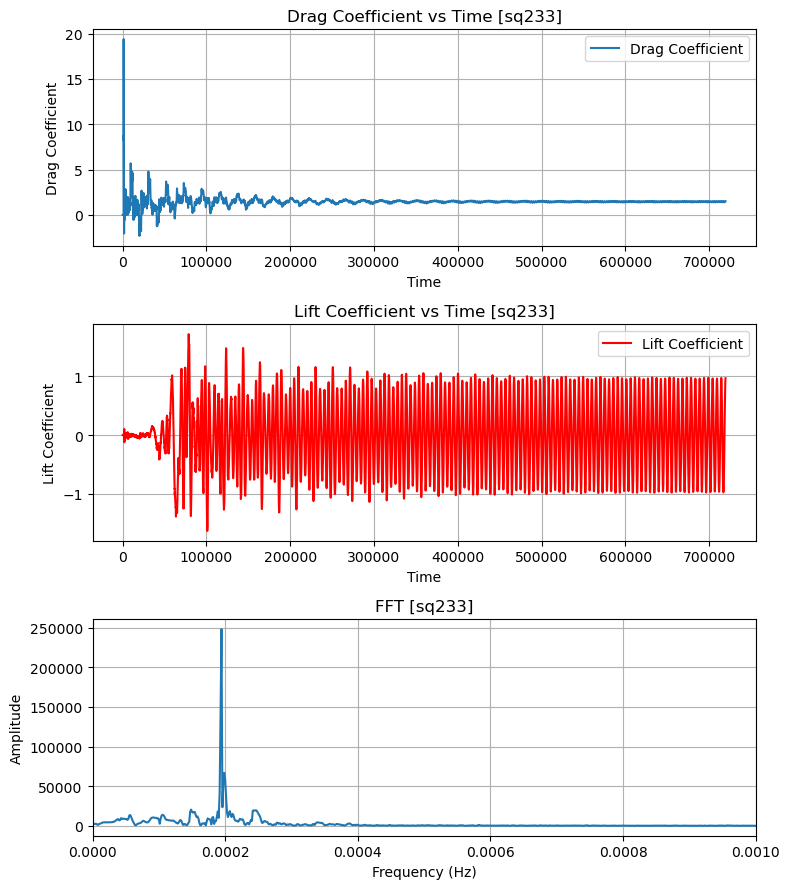

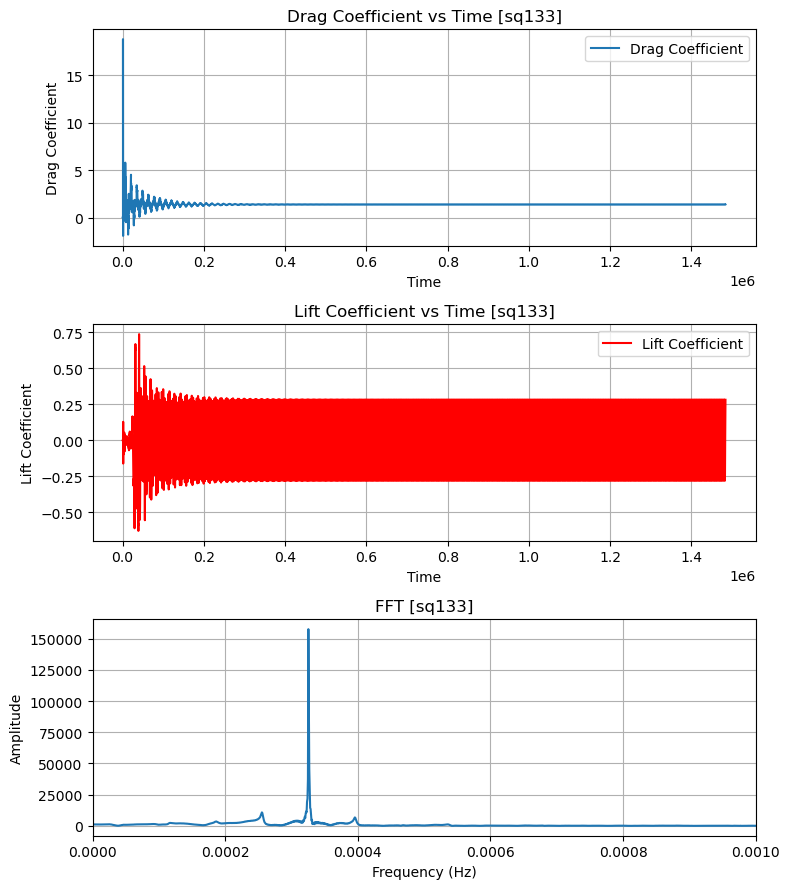

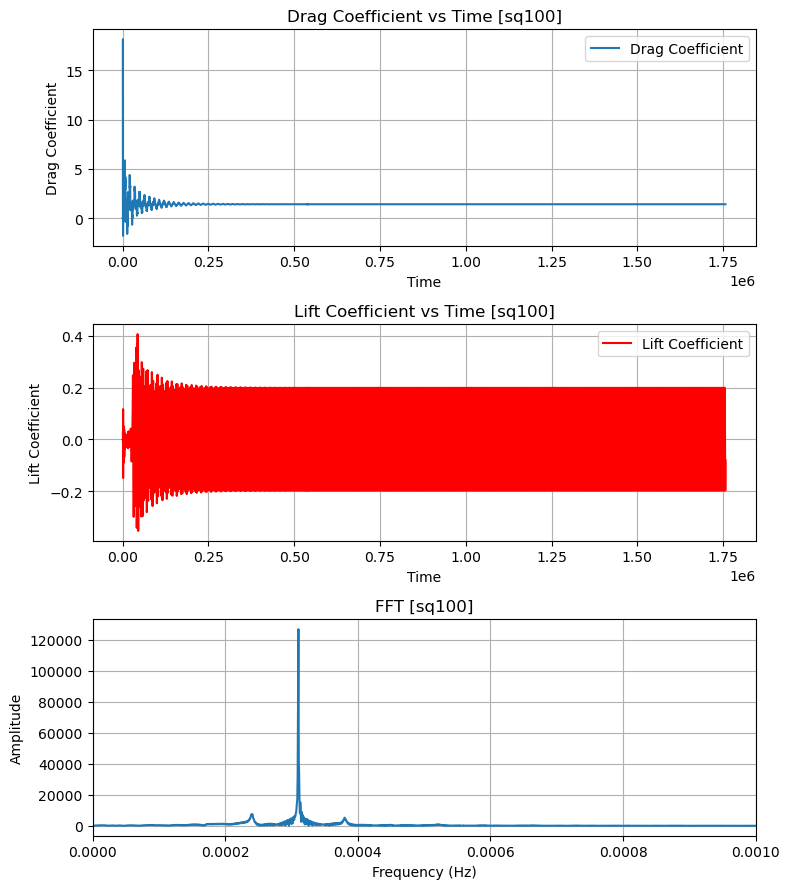

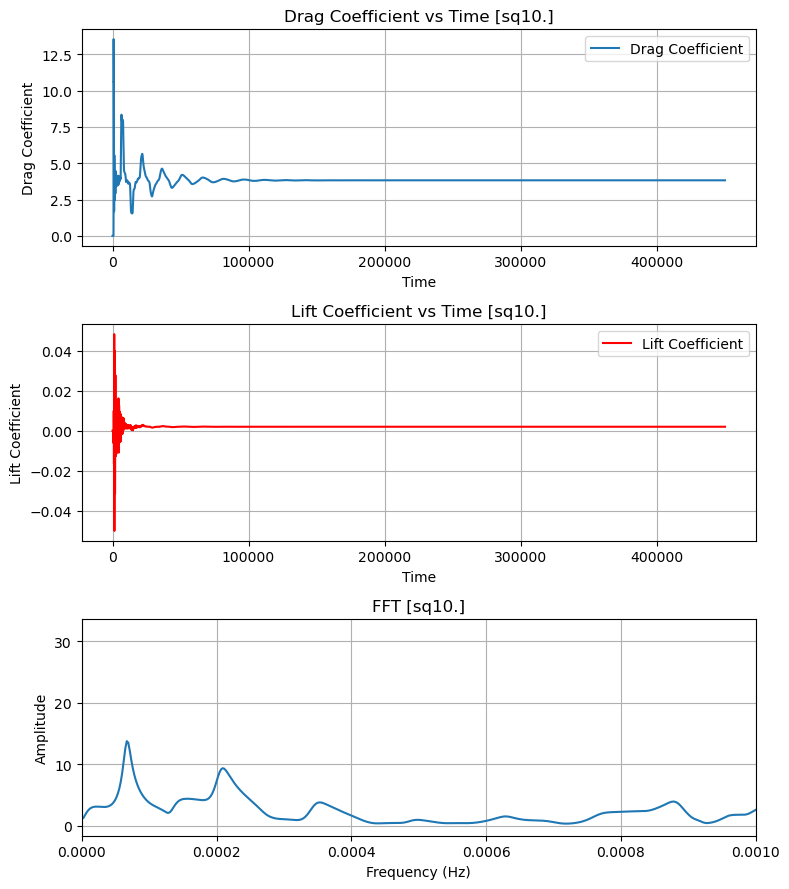

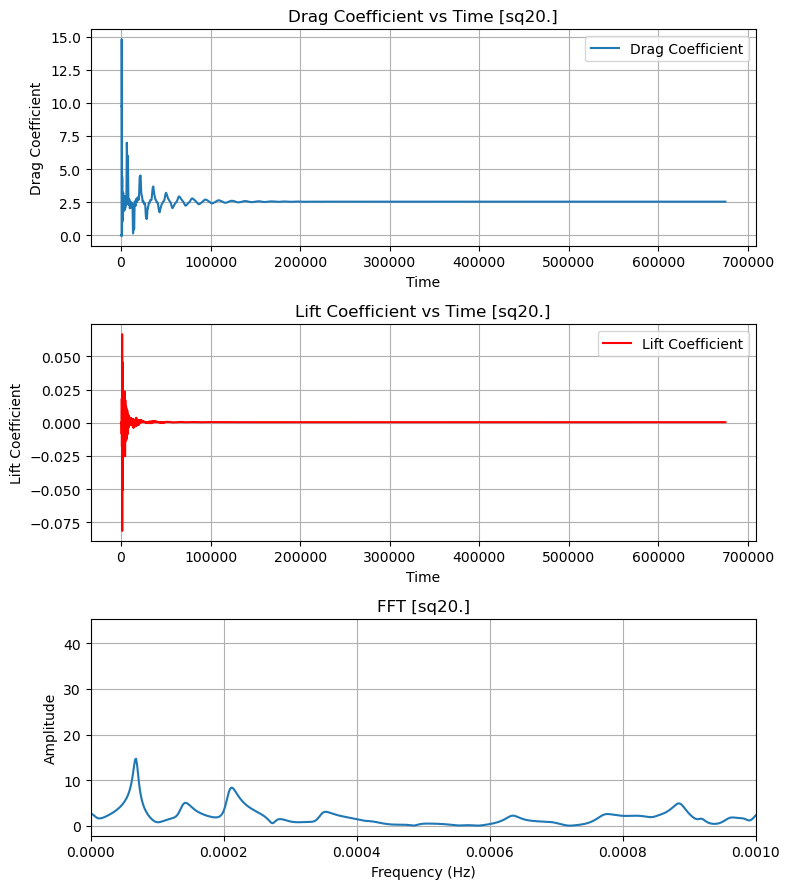

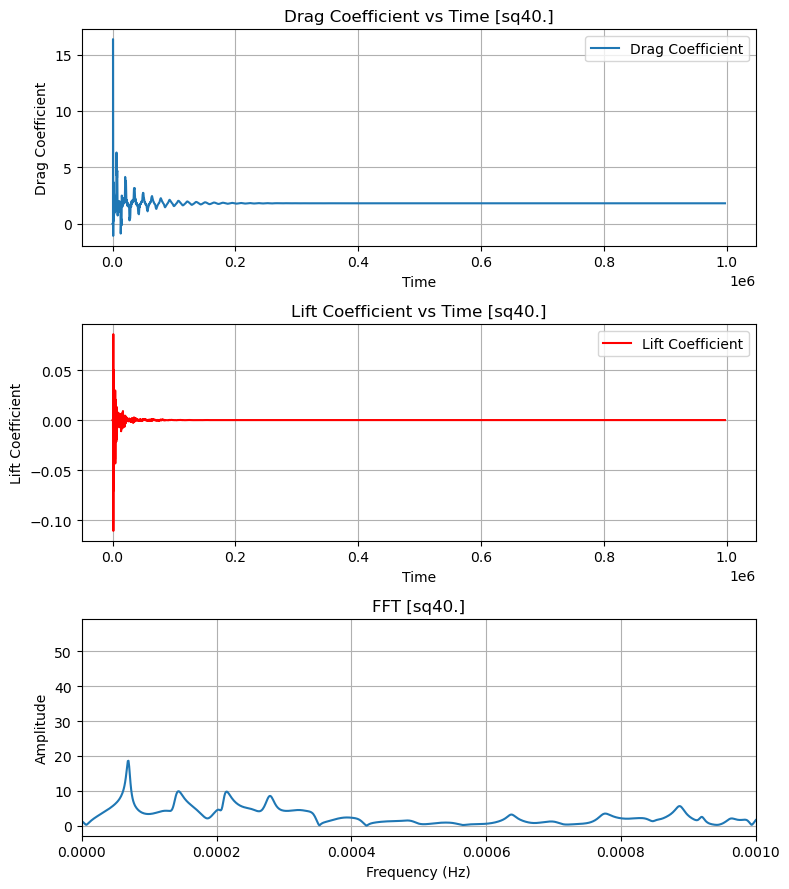

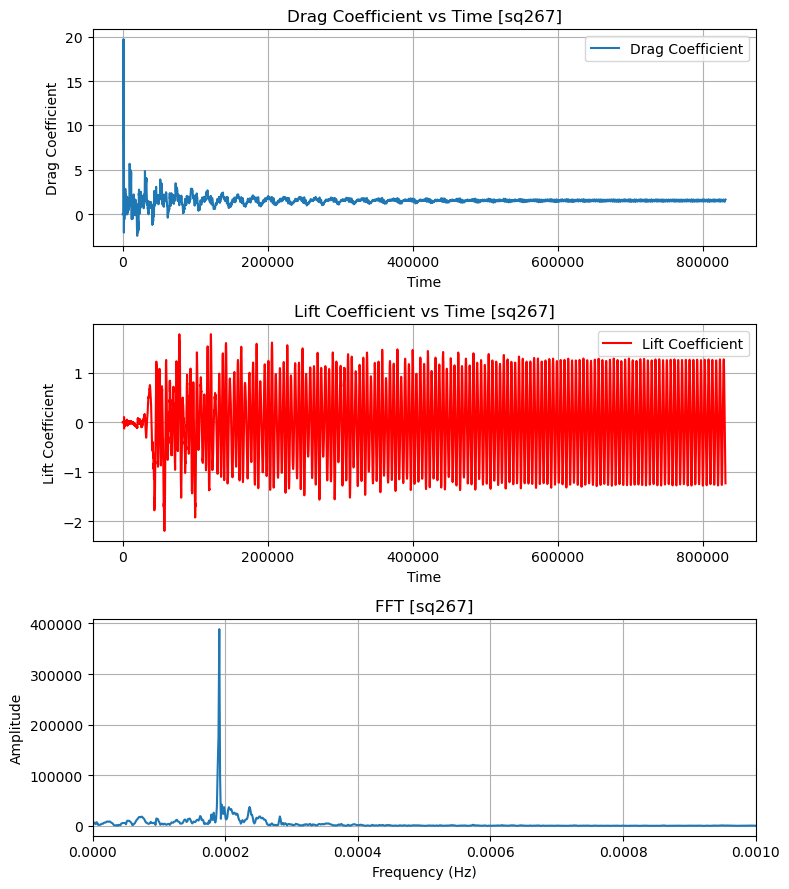

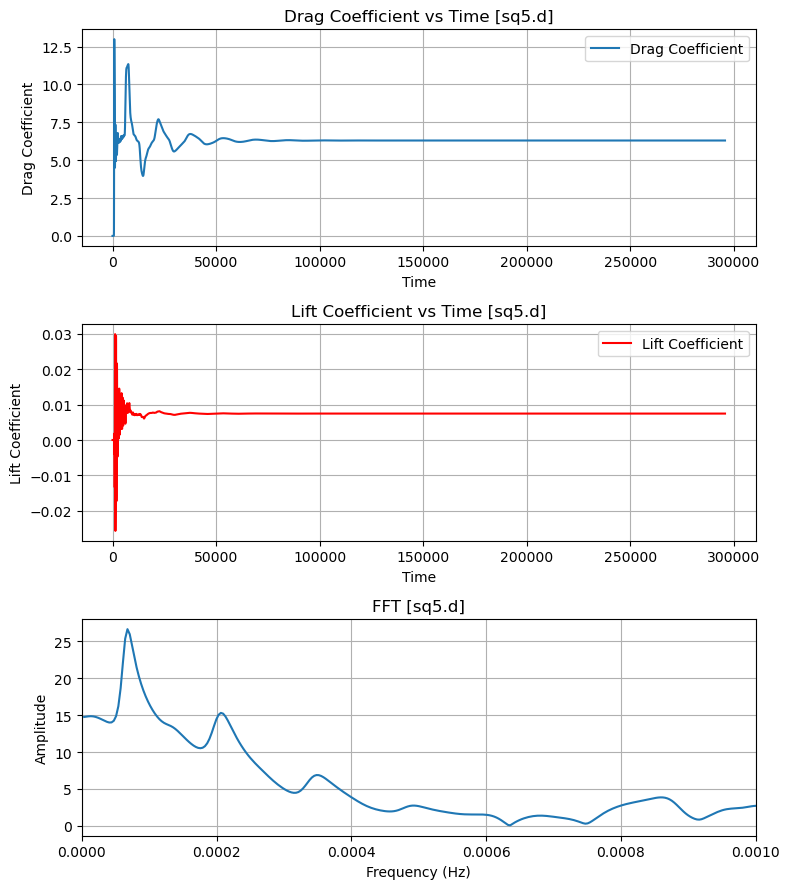

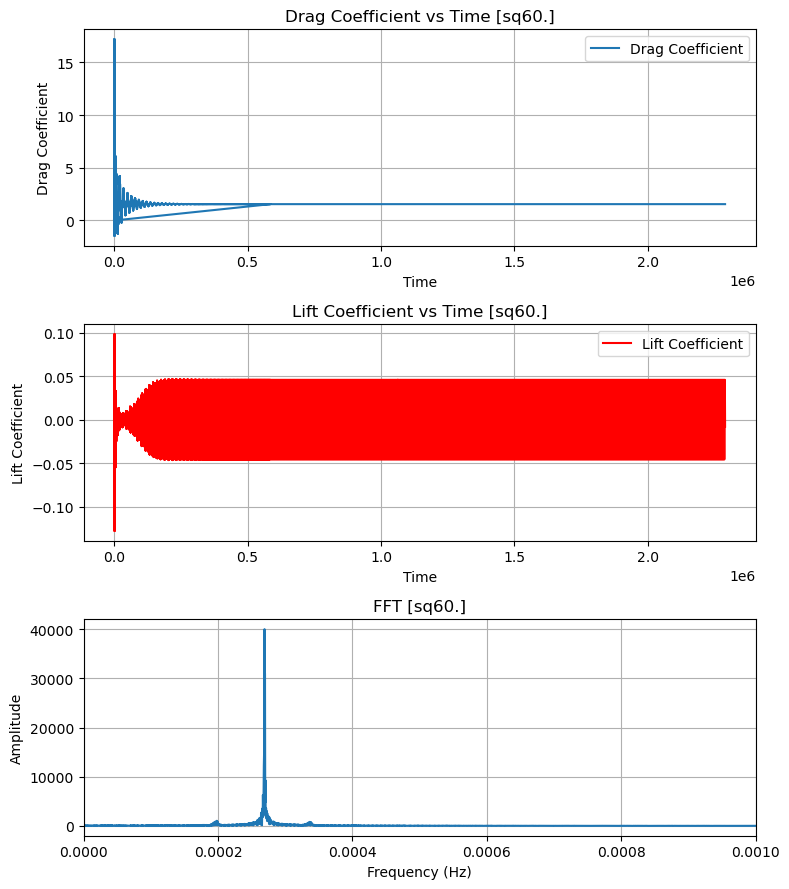

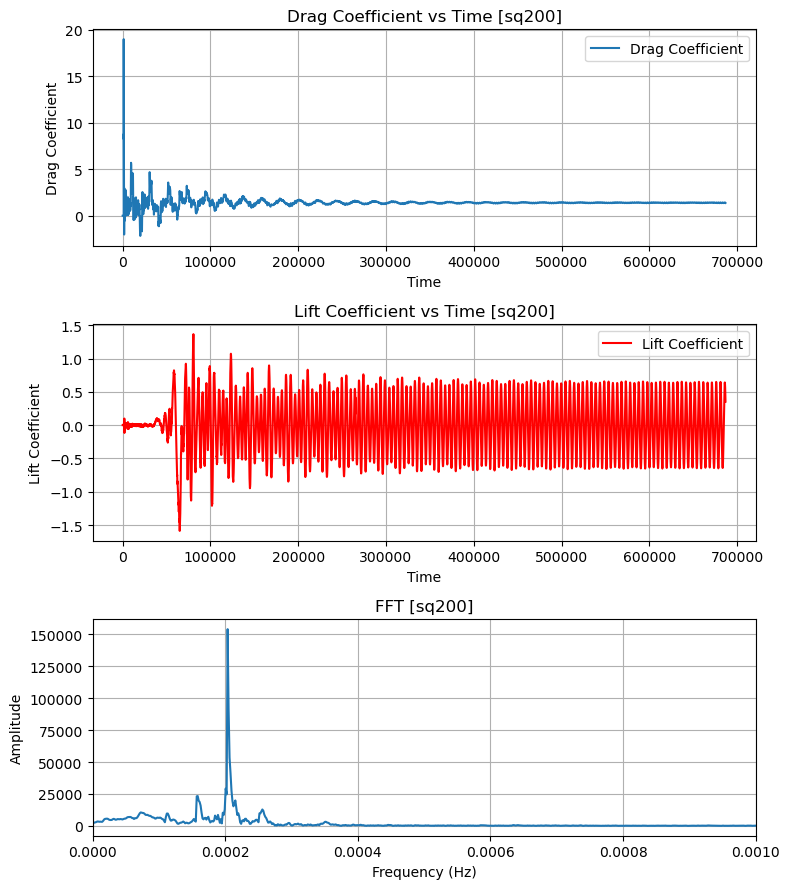

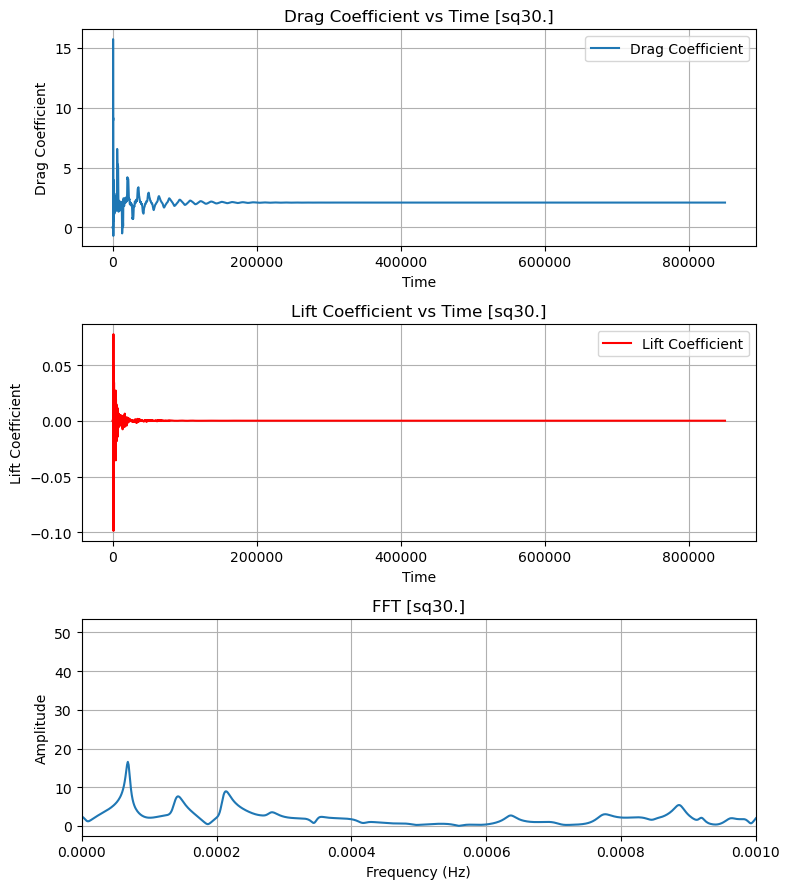

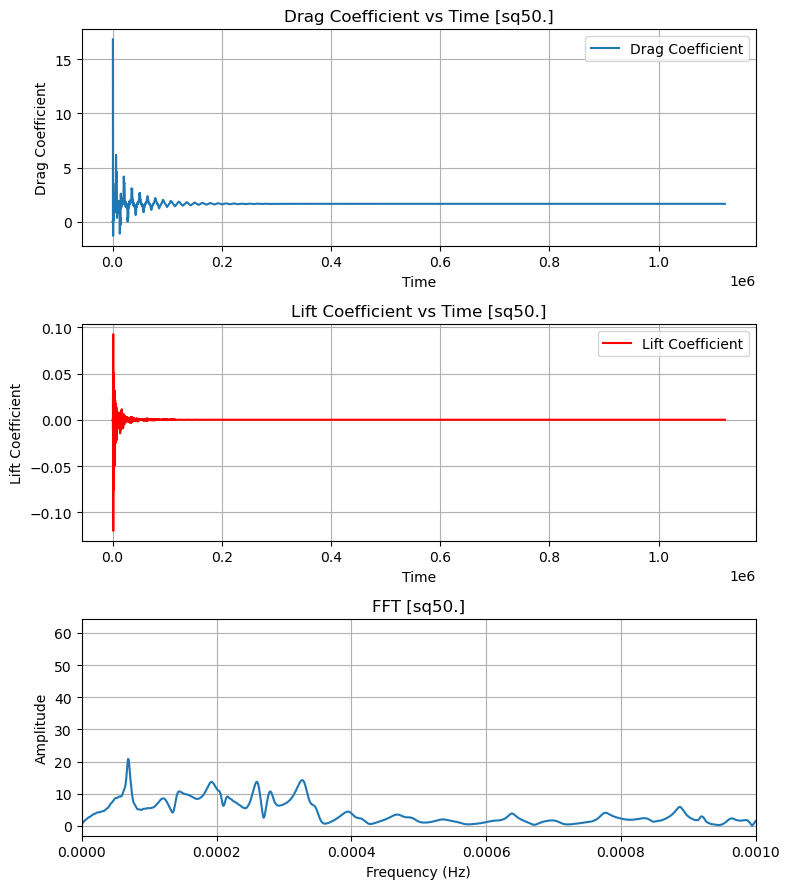

In [14]:
N = 50000

pathlist = Path(inputfolder).glob('**/*.data')
for path in pathlist:
    # because path is object not string
    filePath = str(path)
    # print(filePath)
    with open(filePath) as input_file:
        # with open('./Cd/Re100/momentum_exchange.data') as input_file:
        lines = input_file.readlines()
        newLines = []
        for line in lines:
            newLine = line.strip().split()
            newLines.append( newLine )

    with open('output.csv', 'w') as test_file:
        file_writer = csv.writer(test_file)
        file_writer.writerows( newLines)

    # Open the input and output files
    with open('output.csv', 'r') as infile, open('output1.csv', 'w') as outfile:
        # Read the lines from the input file
        lines = infile.readlines()

        # Iterate through the lines, skipping every alternate line
        for i, line in enumerate(lines):
            if i % 2 == 0 or line.strip():  # If it's an even line or not empty
                outfile.write(line)

    # Read the CSV file into a DataFrame
    df = pd.read_csv('output1.csv', header=None)

    # Split the DataFrame into two columns
    column1 = df[0][-4*N:]
    column2 = df[1][-4*N:]
    column3 = df[2][-4*N:]
    mean_drag = np.mean(column2[-2*N:])
    mean_lift = np.mean(column3[-2*N:])
    print(f'mean drag = {mean_drag}')
    print(f'mean lift = {mean_lift}')

    column3_data = column3.to_numpy()
    column3_freq, column3_fft = getfft(column3_data) 

    # Create a figure and axis objects for the main plot and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 9))

    # Plot the second column against the first column as a line plot in the first subplot
    ax1.plot(column1, column2, label='Drag Coefficient', linestyle='-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Drag Coefficient')
    ax1.set_title(f'Drag Coefficient vs Time [{str(input_file)[35:40]}]')
    ax1.grid(True)
    ax1.legend()

    # Plot the third column against the first column as a line plot in the second subplot
    ax2.plot(column1, column3, label='Lift Coefficient', linestyle='-',color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Lift Coefficient')
    ax2.set_title(f'Lift Coefficient vs Time [{str(input_file)[35:40]}]')
    ax2.grid(True)
    ax2.legend()


    ax3.plot(column3_freq, column3_fft)
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('Amplitude')
    ax3.set_title(f'FFT [{str(input_file)[35:40]}]')
    ax3.grid(True)
    ax3.set_xlim(0,0.001)

    plt.tight_layout()

    # Save the plot as an image file (e.g., PNG)
    filename = os.path.basename(filePath)
    plt.savefig(outputfolder+'/plot_'+filename+'.png')

    peaks_x, _ = find_peaks(column3_fft)
    i_max_peak = peaks_x[np.argmax(column3_fft[peaks_x])]

    peak_freq = column3_freq[i_max_peak]
    print(filename+ " frequency: "+ str(peak_freq)+ " Hz")
    